<a href="https://colab.research.google.com/github/WoradeeKongthong/ComputerVision/blob/master/Image_data_preparation_with_Pillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import PIL
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Load and display image using Pillow.

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(901, 1200)


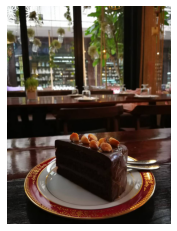

In [10]:
# load the image
img = PIL.Image.open('data/cake.jpg')

# summarize image details
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

# show the image
# image.show()
plt.imshow(img)
plt.axis("off")
plt.show()

# Load image as numpy array using matplotlib.image

<class 'numpy.ndarray'>
uint8
(1200, 901, 3)


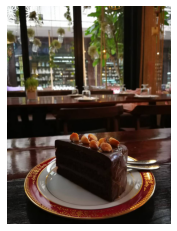

In [12]:
# load image as pixel array
pixels = matplotlib.image.imread('data/cake.jpg')

# summarize pixels details
print(type(pixels))
print(pixels.dtype)
print(pixels.shape)

# display the pixel array as an image
plt.imshow(pixels)
plt.axis('off')
plt.show()

# Convert Pillow Image to and from numpy array

Original image


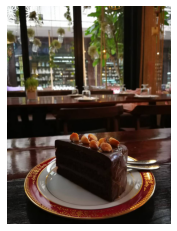


After conversion
type :  <class 'numpy.ndarray'>
image array shape : (1200, 901, 3)


In [13]:
img = PIL.Image.open('data/cake.jpg')
print('Original image')
plt.imshow(img)
plt.axis('off')
plt.show()

# convert PIL image to numpy array
img_array = np.asarray(img)

# summarize array details
print('\nAfter conversion')
print('type : ', type(img_array))
print('image array shape :', img_array.shape)

img2


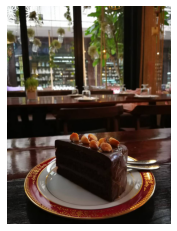

None
RGB
(901, 1200)


In [14]:
# Convert back to Pillow image
img2 = PIL.Image.fromarray(img_array)

# display the image
print('img2')
plt.imshow(img2)
plt.axis('off')
plt.show()

# summarize image details
print(img2.format)
print(img2.mode)
print(img2.size)

# Load all images in a directory as a list using matplotlib.image.imread()

In [16]:
from os import listdir

# load all images in a directory Homu
loaded_images = list()
for filename in listdir('data/Homu'):
  img_data = matplotlib.image.imread('data/Homu/'+filename)
  loaded_images.append(img_data)
  print('loaded %s %s' %(filename, img_data.shape))

print(type(loaded_images))
print(type(loaded_images[0]))

loaded Homu5.jpg (2364, 1773, 3)
loaded Homu3.jpg (1773, 2364, 3)
loaded Homu1.jpg (2364, 1773, 3)
loaded Homu4.jpg (2364, 1773, 3)
loaded Homu2.jpg (2364, 1773, 3)
<class 'list'>
<class 'numpy.ndarray'>


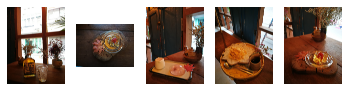

In [17]:
for i,img in enumerate(loaded_images):
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.grid()
plt.show()

# Save Pillow images to file

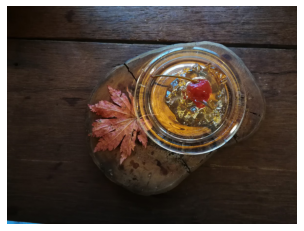

In [18]:
img = PIL.Image.open('data/Homu/Homu3.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
# save img as PNG format
img.save('data/Homu3.png', format='PNG')

# Convert Pillow image to other mode

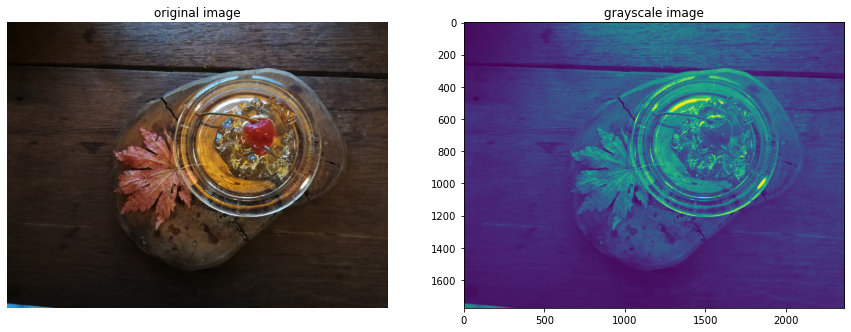

In [26]:
# convert the image to grayscale
gs_img = img.convert(mode='L')

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('original image')

plt.subplot(1,2,2)
plt.imshow(gs_img)
plt.axis('off')
plt.title('grayscale image')

plt.show()

# Resize image : thumbnail vs resize

original image size : (2364, 1773)


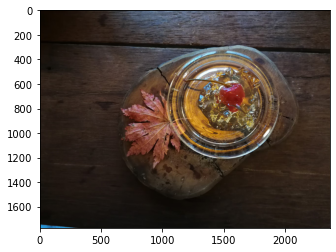

after thumbnail : (200, 150)


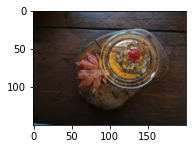

In [33]:
# thumbnail (keep aspect ratio)

# load original image
img = PIL.Image.open('data/Homu/Homu3.jpg')
print(f'original image size : {img.size}')
plt.imshow(img)
plt.show()

# create a thumbnail and preserve aspect ratio
img.thumbnail((200,200))
plt.subplot(1,2,2)
print(f'after thumbnail : {img.size}')
plt.imshow(img)
plt.show()

original image size :  (2364, 1773)


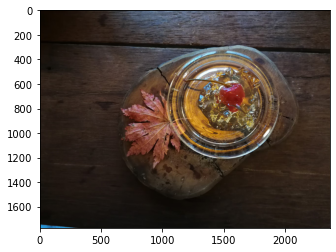

after resize :  (200, 200)


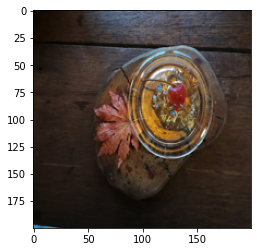

In [35]:
# resize : force into a new shape

# load image
img = PIL.Image.open('data/Homu/Homu3.jpg')
print('original image size : ',img.size)
plt.imshow(img)
plt.show()

# resize
img_resized = img.resize((200,200))
print('after resize : ', img_resized.size)
plt.imshow(img_resized)
plt.show()

# Flip, Rotate, Crop

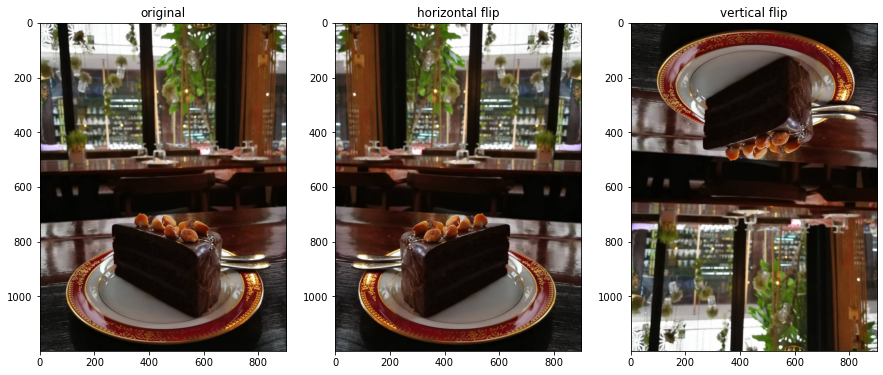

In [47]:
# load image
img = PIL.Image.open('data/cake.jpg')

# horizontal flip
hoz_flip = img.transpose(PIL.Image.FLIP_LEFT_RIGHT)

# vertical flip
ver_flip = img.transpose(PIL.Image.FLIP_TOP_BOTTOM)

plt.figure(figsize=(15,8))

# plot all 
plt.subplot(131)
plt.imshow(img)
plt.title('original')

plt.subplot(132)
plt.imshow(hoz_flip)
plt.title('horizontal flip')

plt.subplot(133)
plt.imshow(ver_flip)
plt.title('vertical flip')

plt.show()

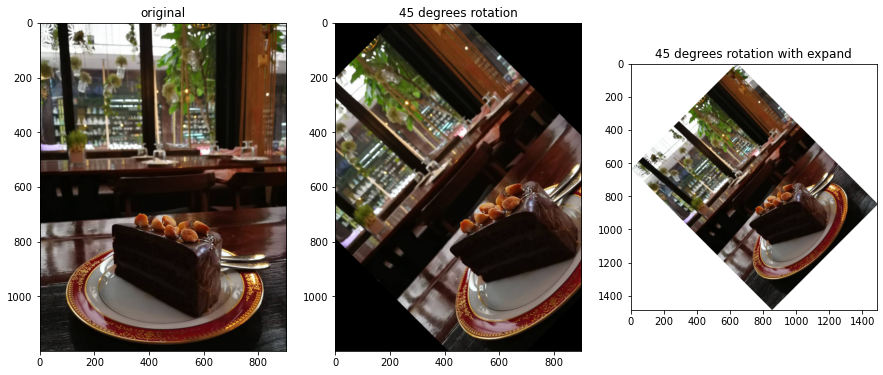

In [48]:
# load image
img = PIL.Image.open('data/cake.jpg')

plt.figure(figsize=(15,8))

# original image
plt.subplot(131)
plt.imshow(img)
plt.title('original')

# rotate 45 degrees not expand
plt.subplot(132)
plt.imshow(img.rotate(45))
plt.title('45 degrees rotation')

# rotat 45 degrees with expand
plt.subplot(133)
plt.imshow(img.rotate(45, expand=1, fillcolor='white'))
plt.title('45 degrees rotation with expand')

plt.show()

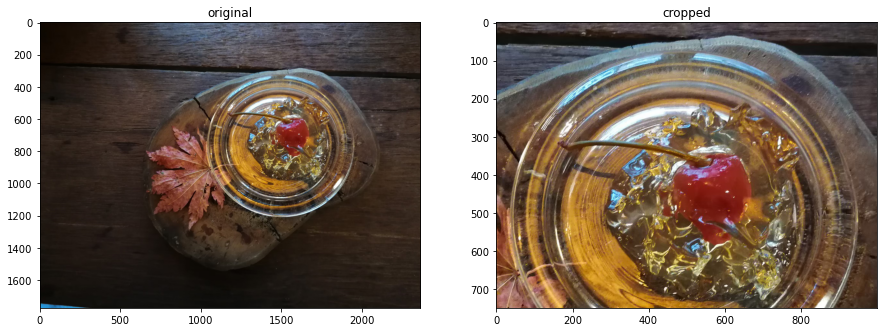

original size :  (2364, 1773)
cropped size :  (1000, 750)


In [49]:
# Crop

# load image
img = PIL.Image.open('data/Homu/Homu3.jpg')

plt.figure(figsize=(15,8))

#plot
plt.subplot(121)
plt.imshow(img)
plt.title('original')

#cropped image
cropped = img.crop((1000,250,2000,1000))
# plot 
plt.subplot(122)
plt.imshow(cropped)
plt.title('cropped')

plt.show()

print('original size : ',img.size)
print('cropped size : ', cropped.size)

# Normalize Pixel values

In [50]:
# load image
img = PIL.Image.open('data/Homu/Homu1.jpg')
# convert image to numpy array
pixels = np.asarray(img)

# summarize details
print('Data type : %s' % pixels.dtype)
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))

Data type : uint8
Min : 0.000, Max : 255.000


In [51]:
# convert uint8 to float
pixels = pixels.astype('float32')

# summarize details
print('Data type : %s' % pixels.dtype)
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))

Data type : float32
Min : 0.000, Max : 255.000


In [52]:
# Normalize to range 0-1
pixels /= 255.0
print('Data type : %s' % pixels.dtype)
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))

Data type : float32
Min : 0.000, Max : 1.000


# Center Pixel Values
*   per image
*   per mini-batch
*   per epoch


*   Global centering : across color channels
*   Local centering : per color channel

## Global centering - one image

In [55]:
# prepare float32 type pixels data
img = PIL.Image.open('data/cake.jpg')
pixels = np.asarray(img)
pixels = pixels.astype('float32')

# calculate global mean (across channels)
global_mean = pixels.mean()
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))
print('Global mean : %.3f'%global_mean)

# Global Centering of pixels
pixels = pixels - global_mean

# confirm centering effect
global_mean = pixels.mean()
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))
print('Global mean : %.3f'%global_mean)

Min : 0.000, Max : 255.000
Global mean : 66.967
Min : -66.967, Max : 188.033
Global mean : -0.000


In [61]:
pixels

array([[[ 1.7003275e+02,  1.7403275e+02,  1.7303275e+02],
        [ 1.7503275e+02,  1.7903275e+02,  1.7803275e+02],
        [ 1.7703275e+02,  1.8103275e+02,  1.8003275e+02],
        ...,
        [ 1.6303275e+02,  1.6703275e+02,  1.6603275e+02],
        [ 1.6403275e+02,  1.6803275e+02,  1.6703275e+02],
        [ 1.6203275e+02,  1.6603275e+02,  1.6503275e+02]],

       [[ 1.7003275e+02,  1.7403275e+02,  1.7303275e+02],
        [ 1.7503275e+02,  1.7903275e+02,  1.7803275e+02],
        [ 1.7603275e+02,  1.8003275e+02,  1.7903275e+02],
        ...,
        [ 1.5703275e+02,  1.6103275e+02,  1.6003275e+02],
        [ 1.5403275e+02,  1.5803275e+02,  1.5703275e+02],
        [ 1.5103275e+02,  1.5503275e+02,  1.5403275e+02]],

       [[ 1.7003275e+02,  1.7403275e+02,  1.7303275e+02],
        [ 1.7303275e+02,  1.7703275e+02,  1.7603275e+02],
        [ 1.7403275e+02,  1.7803275e+02,  1.7703275e+02],
        ...,
        [ 1.5503275e+02,  1.5903275e+02,  1.5803275e+02],
        [ 1.5003275e+02,  1.5

## Local centering 
Note : need to set local mean dtype to 'float64'

In [63]:
# prepare float32 type pixels data
img = PIL.Image.open('data/cake.jpg')
pixels = np.asarray(img)
pixels = pixels.astype('float32')

# calculate local mean (in each channel)
local_means = pixels.mean(axis=(0,1), dtype='float64')
print('Min : %s, Max : %s' %(pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
print('local_means : %s' %local_means)

# Local Centering of pixels
pixels = pixels - local_means

# confirm centering effect
local_means = pixels.mean(axis=(0,1), dtype='float64')
print('\nAfter Local Centering')
print('Min : %s, Max : %s' %(pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
print('local_means : %s' %local_means)


Min : [0. 0. 0.], Max : [255. 255. 255.]
local_means : [80.44059101 66.26089808 54.20023215]

After Local Centering
Min : [-80.44059101 -66.26089808 -54.20023215], Max : [174.55940899 188.73910192 200.79976785]
local_means : [4.26469634e-11 1.97014049e-10 4.12378838e-11]


# Standardize Pixel Values (Centering at 0, Normalising at s.d.)

*   per image
*   per mini-batch
*   per epoch


*   Global standardization : across color channels
*   Local standardization : per color channel

## Global Standardization


In [75]:
# prepare float32 type pixels data
img = PIL.Image.open('data/cake.jpg')
pixels = np.asarray(img)
pixels = pixels.astype('float32')

# calculate global mean and s.d.
global_mean, global_sd = pixels.mean(), pixels.std()
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))
print('Global mean : %.3f, S.D. : %.3f'%(global_mean, global_sd))

# Global Standardization of pixels
pixels = (pixels - global_mean) / global_sd

# confirm standardization effect
global_mean, global_sd = pixels.mean(), pixels.std()
print('\nAfter Global Standardization')
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))
print('Global mean : %.3f, S.D. : %.3f'%(global_mean, global_sd))

Min : 0.000, Max : 255.000
Global mean : 66.967, S.D. : 63.656

After Global Standardization
Min : -1.052, Max : 2.954
Global mean : -0.000, S.D. : 1.000


## Positive Global Standardization 
clip the standardized pixels to the range [-1,1]  
then rescale to [0,1]

In [77]:
# prepare float32 type pixels data
img = PIL.Image.open('data/cake.jpg')
pixels = np.asarray(img)
pixels = pixels.astype('float32')

# calculate global mean and s.d.
global_mean, global_sd = pixels.mean(), pixels.std()
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))
print('Global mean : %.3f, S.D. : %.3f'%(global_mean, global_sd))

# Global Standardization of pixels
pixels = (pixels - global_mean) / global_sd

# clip pixels to [-1,1]
pixels = np.clip(pixels, -1.0, 1.0)

# shift from [-1,1] to [0,1] with 0.5 mean
pixels = (pixels + 1.0) / 2.0

# confirm standardization effect
global_mean, global_sd = pixels.mean(), pixels.std()
print('\nAfter Positive Global Standardization')
print('Min : %.3f, Max : %.3f' %(pixels.min(), pixels.max()))
print('Mean : %.3f, S.D. : %.3f'%(global_mean, global_sd))

Min : 0.000, Max : 255.000
Global mean : 66.967, S.D. : 63.656

After Positive Global Standardization
Min : 0.000, Max : 1.000
Mean : 0.435, S.D. : 0.368


## Local Standardization

In [78]:
# prepare float32 type pixels data
img = PIL.Image.open('data/cake.jpg')
pixels = np.asarray(img)
pixels = pixels.astype('float32')

# calculate local mean and s.d. (in each channel)
local_means = pixels.mean(axis=(0,1), dtype='float64')
local_sds = pixels.std(axis=(0,1), dtype='float64')
print('Original pixels')
print('Min : %s, Max : %s' %(pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
print('Local means : %s, \nlocal S.D. : %s'%(local_means, local_sds))

# Local Standardization of pixels
pixels = (pixels - local_means) / local_sds

# confirm standardization effect
local_means = pixels.mean(axis=(0,1), dtype='float64')
local_sds = pixels.std(axis=(0,1), dtype='float64')
print('\nAfter Local Standardization')
print('Min : %s, Max : %s' %(pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
print('Local means : %s, \nlocal S.D. : %s'%(local_means, local_sds))

Original pixels
Min : [0. 0. 0.], Max : [255. 255. 255.]
Local means : [80.44059101 66.26089808 54.20023215], 
local S.D. : [63.73563425 62.71321529 61.77343208]

After Local Standardization
Min : [-1.2620976  -1.05656994 -0.87740361], Max : [2.73880398 3.00955869 3.25058461]
Local means : [-1.86617043e-14  3.65251585e-13  4.09586709e-14], 
local S.D. : [1. 1. 1.]
